##Imports

In [1]:
import tensorflow as tf
from scipy.io.wavfile import read,write
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from IPython.display import Audio, display
import tensorflow as tf
import librosa
import re
import datetime
import json
import requests
import pandas as pd
import time
from tensorflow.keras.models import save_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##UA Speech Dataset

Loading in Dataset

In [ ]:
!tar xvzf /content/drive/MyDrive/UASpeech_original_C.tgz

In [ ]:
!tar xvzf /content/drive/MyDrive/UASpeech_original_FM.tgz

In [ ]:
def preprocess_folder(folder_path,positive,sampling_rate):
  files_list = os.listdir(folder_path)
  list_of_wavs, list_of_labels = [], []
  for f in files_list:
    if f.endswith(".wav") and f[0] != ".":
      file_path = os.path.join(folder_path,f)
      wav = librosa.load(file_path,sr=sampling_rate)
      if sampling_rate*8 >= len(wav[0]) >= sampling_rate*2:
        padded_wav = np.pad(wav[0],(0,sampling_rate*8-len(wav[0])),mode='constant')
        list_of_wavs.append(padded_wav)
        # for itm in librosa.feature.mfcc(y=padded_wav, sr=sampling_rate): list_of_wavs.append(itm)
        if positive:
          list_of_labels.append(1)
        else:
          list_of_labels.append(0)
  return list_of_wavs, list_of_labels

In [ ]:
total_list_of_wavs, total_list_of_labels = [], []
for i in os.listdir("/content/drive/MyDrive/UASpeech/audio/original"):
  print(i)
  if i.startswith("C"):
    list_of_wavs, list_of_labels = preprocess_folder(f"/content/drive/MyDrive/UASpeech/audio/original/{i}",False,16000)
  else:
    list_of_wavs, list_of_labels = preprocess_folder(f"/content/drive/MyDrive/UASpeech/audio/original/{i}",True,16000)
  for itm in list_of_wavs: total_list_of_wavs.append(itm)
  for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
uaspeech_dataset = tf.data.Dataset.from_tensor_slices((total_list_of_wavs, total_list_of_labels))

In [ ]:
uaspeech_dataset_sample = uaspeech_dataset.shuffle(buffer_size=14000)
uaspeech_dataset_sample = uaspeech_dataset.take(14000)

Loading from Drive

In [2]:
uaspeech_dataset = tf.data.Dataset.load("/content/drive/MyDrive/UASpeech_TF_Dataset_2")

In [3]:
uaspeech_dataset_sample = uaspeech_dataset.shuffle(buffer_size=14000)
uaspeech_dataset_sample = uaspeech_dataset.take(14000)

## TORGO Dataset

Loading in Dataset

In [ ]:
!curl -O https://www.cs.toronto.edu/~complingweb/data/TORGO/F.tar.bz2

In [ ]:
!tar xvjf /content/F.tar.bz2

In [ ]:
!mkdir female-dysarthria
!mkdir female-normal
!mkdir male-dysarthria
!mkdir male-normal

In [ ]:
shutil.move('/content/F01','/content/female-dysarthria')
shutil.move('/content/F04','/content/female-dysarthria')
shutil.move('/content/F03','/content/female-dysarthria')

In [ ]:
!curl -O https://www.cs.toronto.edu/~complingweb/data/TORGO/FC.tar.bz2

In [ ]:
!tar xvjf /content/FC.tar.bz2

In [ ]:
!curl -O https://www.cs.toronto.edu/~complingweb/data/TORGO/M.tar.bz2

In [ ]:
!curl -O https://www.cs.toronto.edu/~complingweb/data/TORGO/MC.tar.bz2

In [ ]:
shutil.move('/content/FC01','/content/female-normal')
shutil.move('/content/FC02','/content/female-normal')
shutil.move('/content/FC03','/content/female-normal')

In [ ]:
!tar xvjf /content/M.tar.bz2

In [ ]:
!tar xvjf /content/MC.tar.bz2

In [ ]:
shutil.move('/content/M01','/content/male-dysarthria')
shutil.move('/content/M02','/content/male-dysarthria')
shutil.move('/content/M03','/content/male-dysarthria')
shutil.move('/content/M04','/content/male-dysarthria')
shutil.move('/content/M05','/content/male-dysarthria')

In [ ]:
shutil.move('/content/MC01','/content/male-normal')
shutil.move('/content/MC02','/content/male-normal')
shutil.move('/content/MC03','/content/male-normal')
shutil.move('/content/MC04','/content/male-normal')

In [ ]:
def preprocess_folder(folder_path,positive,sampling_rate):
  files_list = os.listdir(folder_path)
  list_of_wavs, list_of_labels = [], []
  for f in files_list:
    if f.endswith(".wav") and f[0] != ".":
      file_path = os.path.join(folder_path,f)
      wav = librosa.load(file_path,sr=sampling_rate)
      if sampling_rate*8 >= len(wav[0]) >= sampling_rate*2:
        padded_wav = np.pad(wav[0],(0,sampling_rate*8-len(wav[0])),mode='constant')
        list_of_wavs.append(padded_wav)
        if positive:
          list_of_labels.append(1)
        else:
          list_of_labels.append(0)
  return list_of_wavs, list_of_labels

In [ ]:
total_list_of_wavs, total_list_of_labels = [], []

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-dysarthria/F01/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-dysarthria/F03/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-dysarthria/F03/Session2/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-dysarthria/F03/Session3/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-dysarthria/F04/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-dysarthria/F04/Session2/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-normal/FC01/Session1/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-normal/FC02/Session2/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-normal/FC02/Session3/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-normal/FC03/Session1/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-normal/FC03/Session2/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/female-normal/FC03/Session3/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M01/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M01/Session2_3/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M02/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M02/Session2/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M03/Session2/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M04/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M04/Session2/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M05/Session1/wav_arrayMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-dysarthria/M05/Session2/wav_headMic",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC01/Session1/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC01/Session2/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC01/Session3/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC02/Session1/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC02/Session2/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC03/Session1/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC03/Session2/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC04/Session1/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

list_of_wavs, list_of_labels = preprocess_folder(f"/content/male-normal/MC04/Session2/wav_arrayMic",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
torgo_dataset = tf.data.Dataset.from_tensor_slices((total_list_of_wavs, total_list_of_labels))

Loading from Drive

In [4]:
torgo_dataset = tf.data.Dataset.load("/content/drive/MyDrive/TORGO_TF_Dataset")

## Saarbruecken Dataset

In [ ]:
def preprocess_folder(folder_path,positive,sampling_rate):
  files_list = os.listdir(folder_path)
  list_of_wavs, list_of_labels = [], []
  for f in files_list:
    if f.endswith(".wav") and f[0] != ".":
      file_path = os.path.join(folder_path,f)
      wav = librosa.load(file_path,sr=sampling_rate)
      if sampling_rate*8 >= len(wav[0]) >= sampling_rate*2:
        padded_wav = np.pad(wav[0],(0,sampling_rate*8-len(wav[0])),mode='constant')
        list_of_wavs.append(padded_wav)
        if positive:
          list_of_labels.append(1)
        else:
          list_of_labels.append(0)
  return list_of_wavs, list_of_labels

In [ ]:
total_list_of_wavs, total_list_of_labels = [], []

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/drive/MyDrive/SaarbrueckenDataset/healthy",False,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
list_of_wavs, list_of_labels = preprocess_folder(f"/content/drive/MyDrive/SaarbrueckenDataset/pathological",True,16000)
for itm in list_of_wavs: total_list_of_wavs.append(itm)
for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
saarbruecken_dataset = tf.data.Dataset.from_tensor_slices((total_list_of_wavs, total_list_of_labels))

Loading from Drive

In [5]:
saarbruecken_dataset = tf.data.Dataset.load("/content/drive/MyDrive/Saarbruecken_TF_Dataset")

## AVFAD Dataset

In [ ]:
def load_wavs_from_folder(folder_path,positive):
  files_list = os.listdir(folder_path)
  list_of_wavs = []
  for f in files_list:
    if f.endswith(".wav"):
      file_path = os.path.join(folder_path,f)
      list_of_wavs.append(read(file_path)[1])
  if positive:
    list_of_labels = np.ones(len(list_of_wavs))
  else:
    list_of_labels = np.zeros(len(list_of_wavs))
  lengths_list = [len(x) for x in list_of_wavs]
  print(len(list_of_wavs))
  max_length = max(lengths_list)
  total_length = sum(lengths_list)
  min_length = min(lengths_list)
  print(total_length//len(list_of_wavs),max_length,min_length,sep='\n')
  return list_of_wavs,list_of_labels

In [ ]:
!unzip -d data /content/drive/MyDrive/OneDrive_1_7-3-2024.zip

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/AVFAD_01_00_00.xlsx")

In [ ]:
dictionary = dict(zip(data["File ID"], data["CMVD-I Dimension 1 (word system)"]))

In [ ]:
def preprocess_folder(folder_path,positive,sampling_rate):
  files_list = os.listdir(folder_path)
  list_of_wavs, list_of_labels = [], []
  for f in files_list:
    if f.endswith(".wav") and f[0] != ".":
      file_path = os.path.join(folder_path,f)
      wav = librosa.load(file_path,sr=sampling_rate)
      if sampling_rate*8 >= len(wav[0]) >= sampling_rate*2:
        padded_wav = np.pad(wav[0],(0,sampling_rate*8-len(wav[0])),mode='constant')
        list_of_wavs.append(padded_wav)
        if positive:
          list_of_labels.append(1)
        else:
          list_of_labels.append(0)
  return list_of_wavs, list_of_labels

In [ ]:
total_list_of_wavs, total_list_of_labels = [], []
for folder in os.listdir("/content/data/"):
  print(folder)
  for folder2 in os.listdir(os.path.join("/content/data",folder)):
    if dictionary[folder2] == "Normal":
      list_of_wavs, list_of_labels = preprocess_folder(f"/content/data/{folder}/{folder2}",False,16000)
    else:
      list_of_wavs, list_of_labels = preprocess_folder(f"/content/data/{folder}/{folder2}",True,16000)
    for itm in list_of_wavs: total_list_of_wavs.append(itm)
    for itm in list_of_labels: total_list_of_labels.append(itm)

In [ ]:
avfad_dataset = tf.data.Dataset.from_tensor_slices((total_list_of_wavs, total_list_of_labels))

Loading from Drive

In [6]:
avfad_dataset = tf.data.Dataset.load("/content/drive/MyDrive/AVFAD_TF_Dataset")

## Creating Concatenated Dataset

In [7]:
dataset = uaspeech_dataset_sample.concatenate(saarbruecken_dataset).concatenate(torgo_dataset).concatenate(avfad_dataset)

In [8]:
len(dataset)

22883

##Training Model

In [9]:
def generate_train_test_val_splits(dataset,train_size,test_size,val_size):
  train_size = int(len(dataset)*train_size)
  test_size = int(len(dataset)*test_size)
  val_size = int(len(dataset)*val_size)
  dataset = dataset.shuffle(len(dataset))
  train_dataset = dataset.take(train_size)
  test_dataset = dataset.skip(train_size).take(test_size)
  val_dataset = dataset.skip(train_size+test_size).take(val_size)
  return train_dataset,test_dataset,val_dataset

In [10]:
train_ds, test_ds, val_ds = generate_train_test_val_splits(dataset, 0.7, 0.1, 0.2)

batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [11]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall, Precision

model = models.Sequential([
    layers.Input(shape=(128000, 1)),

    layers.Conv1D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling1D(2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Recall(name='recall'), Precision(name='precision')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128000, 32)        128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 64000, 32)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 64000, 64)         6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 32000, 64)         0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 32000, 128)        24704     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 16000, 128)        0

In [12]:
start_time = time.process_time()
history = model.fit(train_ds, epochs=20, validation_data=val_ds)
test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(test_ds)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test AUC:", test_auc)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

total_time = time.process_time() - start_time
print("Time taken:", total_time)

Epoch 1/20
501/501 [==============================] - 152s 102ms/step - loss: 0.2939 - accuracy: 0.8772 - auc: 0.9224 - recall: 0.9382 - precision: 0.9043 - val_loss: 0.2165 - val_accuracy: 0.9135 - val_auc: 0.9557 - val_recall: 0.9409 - val_precision: 0.9452
Epoch 2/20
501/501 [==============================] - 62s 97ms/step - loss: 0.2186 - accuracy: 0.9116 - auc: 0.9540 - recall: 0.9318 - precision: 0.9510 - val_loss: 0.1888 - val_accuracy: 0.9211 - val_auc: 0.9655 - val_recall: 0.9276 - val_precision: 0.9682
Epoch 3/20
501/501 [==============================] - 62s 97ms/step - loss: 0.1857 - accuracy: 0.9264 - auc: 0.9657 - recall: 0.9414 - precision: 0.9610 - val_loss: 0.1660 - val_accuracy: 0.9395 - val_auc: 0.9763 - val_recall: 0.9548 - val_precision: 0.9650
Epoch 4/20
501/501 [==============================] - 61s 95ms/step - loss: 0.1763 - accuracy: 0.9298 - auc: 0.9690 - recall: 0.9464 - precision: 0.9605 - val_loss: 0.1557 - val_accuracy: 0.9366 - val_auc: 0.9777 - val_recal

## Displaying Results

In [13]:
!mkdir Figures

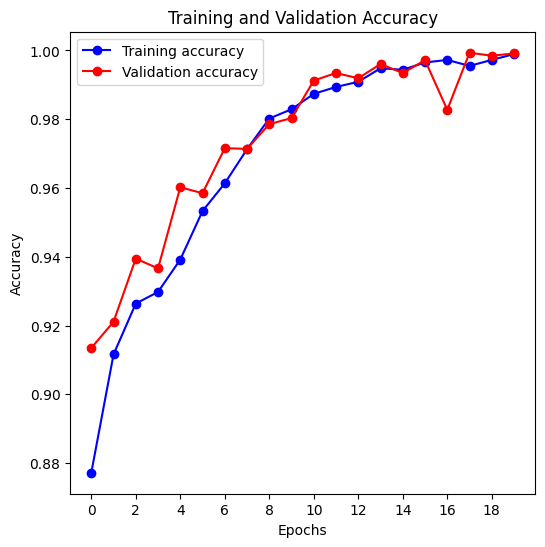

<Figure size 640x480 with 0 Axes>

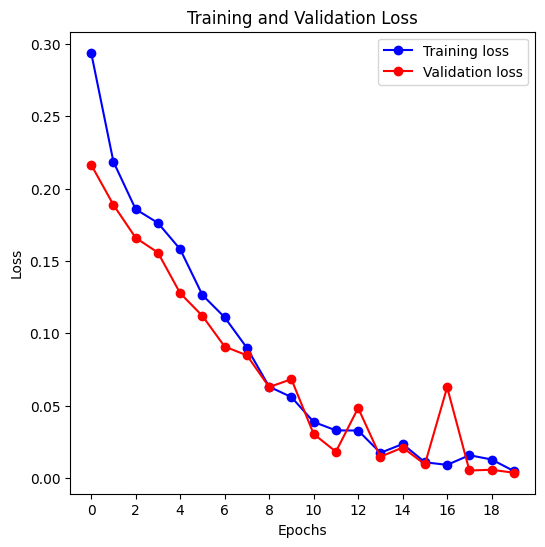

<Figure size 640x480 with 0 Axes>

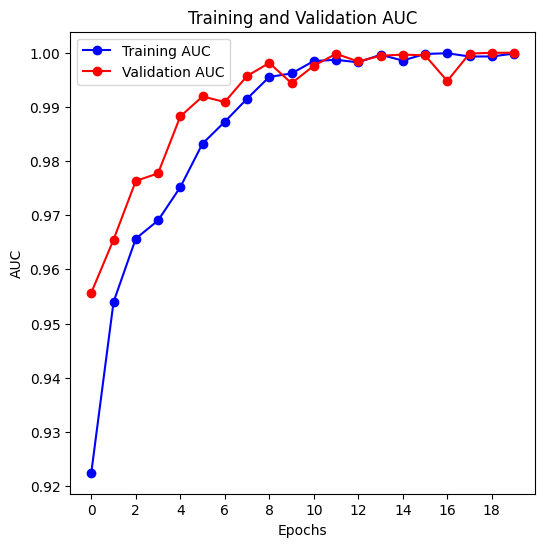

<Figure size 640x480 with 0 Axes>

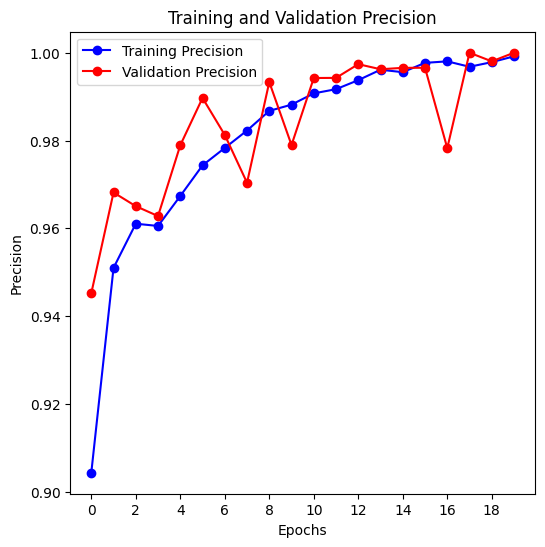

<Figure size 640x480 with 0 Axes>

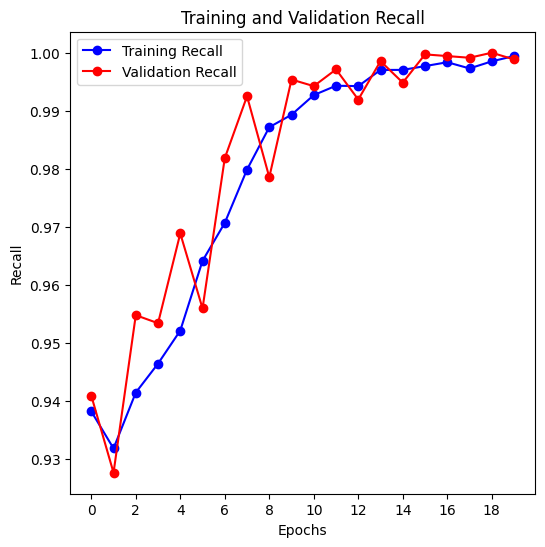

<Figure size 640x480 with 0 Axes>

In [14]:
def create_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    auc = history.history['auc']
    val_auc = history.history['val_auc']
    precision = history.history['precision']
    val_precision = history.history['val_precision']
    recall = history.history['recall']
    val_recall = history.history['val_recall']
    epochs = range(len(acc))

    xticks = range(0, len(acc), 2)

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(xticks)
    plt.legend()
    plt.show()
    plt.savefig('/content/Figures/accuracy.png')

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(xticks)
    plt.legend()
    plt.show()
    plt.savefig('/content/Figures/loss.png')

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, auc, 'bo-', label='Training AUC')
    plt.plot(epochs, val_auc, 'ro-', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.xticks(xticks)
    plt.legend()
    plt.show()
    plt.savefig('/content/Figures/auc.png')

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, precision, 'bo-', label='Training Precision')
    plt.plot(epochs, val_precision, 'ro-', label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.xticks(xticks)
    plt.legend()
    plt.show()
    plt.savefig('/content/Figures/precision.png')

    plt.figure(figsize=(6, 6))
    plt.plot(epochs, recall, 'bo-', label='Training Recall')
    plt.plot(epochs, val_recall, 'ro-', label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.xticks(xticks)
    plt.legend()
    plt.show()
    plt.savefig('/content/Figures/recall.png')

create_plot(history)

##Saving and Evaluating Model

In [15]:
model.save('/content/drive/MyDrive/voice_detection_model.keras')

Evaluation on full UA Speech Dataset

In [36]:
model.evaluate(uaspeech_dataset.batch(1))

75364/75364 [==============================] - 271s 4ms/step - loss: 0.0081 - accuracy: 0.9972 - auc: 0.9998 - recall: 0.9962 - precision: 0.9983


[0.008126880042254925,
 0.9972267746925354,
 0.9998133778572083,
 0.9962264895439148,
 0.9983309507369995]

Evaluation on full TORGO Dataset

In [37]:
model.evaluate(torgo_dataset.batch(1))

6602/6602 [==============================] - 24s 4ms/step - loss: 0.0136 - accuracy: 0.9959 - auc: 0.9997 - recall: 0.9895 - precision: 0.9982


[0.013581029139459133,
 0.9959103465080261,
 0.9997073411941528,
 0.9894640445709229,
 0.9981516003608704]

Evaluation on full Saarbruecken Dataset

In [38]:
model.evaluate(saarbruecken_dataset.batch(1))

728/728 [==============================] - 3s 4ms/step - loss: 0.0014 - accuracy: 0.9986 - auc: 1.0000 - recall: 1.0000 - precision: 0.9982


[0.001435283338651061, 0.9986263513565063, 1.0, 1.0, 0.9982143044471741]

Evaluation on full AVFAD Dataset

In [39]:
model.evaluate(avfad_dataset.batch(1))

1553/1553 [==============================] - 6s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - auc: 1.0000 - recall: 1.0000 - precision: 1.0000


[0.0018985787173733115, 1.0, 1.0, 1.0, 1.0]